In [37]:
export = True

In [38]:
# parse
import re
loss_regex = r"Average loss: (\d+\.\d+)"
comp_regex = r"Bandwidth savings: from \d+ to \d+ \((\d+\.\d+)x\)"

def parse(file, regex):
    nums = []
    for line in open(file, "r").readlines():
        matches = re.search(regex, line)
        if matches:
            nums.append(float(matches.group(1)))
    return nums

def parse_loss(file):
    return parse(file, loss_regex)

def parse_comp_ratio(file):
    return parse(file, comp_regex)


In [39]:
from os import listdir
import pandas as pd

data = {
    "loss": [],
    "name": []
}

files = [file for file in listdir("benchmarks_mnist") if "ignore" not in file]
files.sort(reverse=True)

for name in files:
    file = f"benchmarks_mnist/{name}"
    attrs = {}
    data["loss"].append(parse_loss(file))

    name = name.split("_")[0]

    comp = parse_comp_ratio(file)
    if len(comp) > 0:
        name += f" (compression: {comp[0]/1000:.1f}K)"
    else:
        name += " (no compression)"

    data["name"].append(name)
    

df = pd.DataFrame(data)
df

,loss,name
0,"[0.0541, 0.0377, 0.0334, 0.0288, 0.0293, 0.027...",vanilla SGD (no compression)
1,"[0.1987, 0.1354, 0.1158, 0.1002, 0.0933, 0.089...",sketch (compression: 1.0K)
2,"[0.2107, 0.1573, 0.1311, 0.1192, 0.1101, 0.106...",sketch (compression: 3.6K)


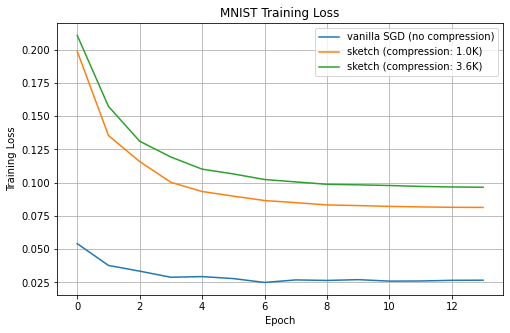

In [40]:
import numpy as np
import matplotlib.pyplot as plt
    
num_epochs = None

plt.figure(figsize=(8, 5)) 
for i, row in df.iterrows():
    row_iters = len(row["loss"])
    if num_epochs is None: num_epochs = row_iters
    else: assert row_iters == num_epochs, "number of its should be consistent"
    t = np.arange(0, num_epochs)
    plt.plot(t, row["loss"], label=row["name"])

plt.title(f"MNIST Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
#plt.yscale("log")
plt.grid(True)
plt.legend()
if export: plt.savefig(f"mnist_loss.svg")
plt.show()